### EfficientDET
Depth, Width, Resoultion을 바꿔가면서 탐지

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import time

model = hub.load('https://tfhub.dev/tensorflow/efficientdet/lite0/detection/1')

!wget https://github.com/Cobslab/imageBible/blob/main/image/test_image.png?raw=true -O test_image.png

--2025-05-07 04:31:23--  https://github.com/Cobslab/imageBible/blob/main/image/test_image.png?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Cobslab/imageBible/raw/refs/heads/main/image/test_image.png [following]
--2025-05-07 04:31:23--  https://github.com/Cobslab/imageBible/raw/refs/heads/main/image/test_image.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Cobslab/imageBible/refs/heads/main/image/test_image.png [following]
--2025-05-07 04:31:24--  https://raw.githubusercontent.com/Cobslab/imageBible/refs/heads/main/image/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

In [2]:
labels_mapping = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',
 7:'train',8:'truck',9:'boat',10:'traffic light', 11:'fire hydrant',
 12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',
 17:'cat',18:'dog',19:'horse',20:'sheep', 21:'cow',22:'elephant',23:'bear',
 24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',
 30:'eye glasses',31:'handbag',32:'tie',33:'suitcase',34:'frisbee',
 35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',
 40:'baseball glove',41:'skateboard',42:'surfboard',43:'tennis racket',
 44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',
 50:'spoon',51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',
 56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',61:'cake',
 62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',
 67:'dining table',68:'window',69:'desk',70:'toilet',71:'door',
 72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',
 78:'microwave',79:'oven',80:'toaster',81:'sink',82:'refrigerator',
 83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',
 88:'teddy bear',89:'hair drier',90:'toothbrush',91:'hair brush'}

In [8]:
def detect_objects(model, img_array, threshold, max_objects = 100, print_time = True):
    img_copy = img_array.copy()
    green = (0,255,0)
    red = (255,0,0)
    tensor_image = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
    start_time = time.time()
    boxes, scores, classes, num_detections = model(tensor_image)
    boxes = boxes.numpy()
    scores = scores.numpy()
    classes = classes.numpy()
    num_detections = num_detections.numpy()

    for i in range(int(num_detections[0])):
      if scores[0, i] < threshold:
        break
      box = boxes[0, i]
      left, top, right, bottom = box[1], box[0], box[3], box[2]
      class_id = classes[0, i]
      caption = "{}: {:.4f}".format(labels_mapping[class_id], scores[0, i])
      cv2.rectangle(img_copy, (int(left), int(top)), (int(right), int(bottom)), green, thickness=2)
      cv2.putText(img_copy, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red, 2)

      if print_time:
        print("탐지 시간: ", round(time.time() - start_time, 2), "seconds")


      return img_copy

--2025-05-07 04:41:07--  https://github.com/Cobslab/imageBible/blob/main/image/test_image.png?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Cobslab/imageBible/raw/refs/heads/main/image/test_image.png [following]
--2025-05-07 04:41:07--  https://github.com/Cobslab/imageBible/raw/refs/heads/main/image/test_image.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Cobslab/imageBible/refs/heads/main/image/test_image.png [following]
--2025-05-07 04:41:07--  https://raw.githubusercontent.com/Cobslab/imageBible/refs/heads/main/image/test_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

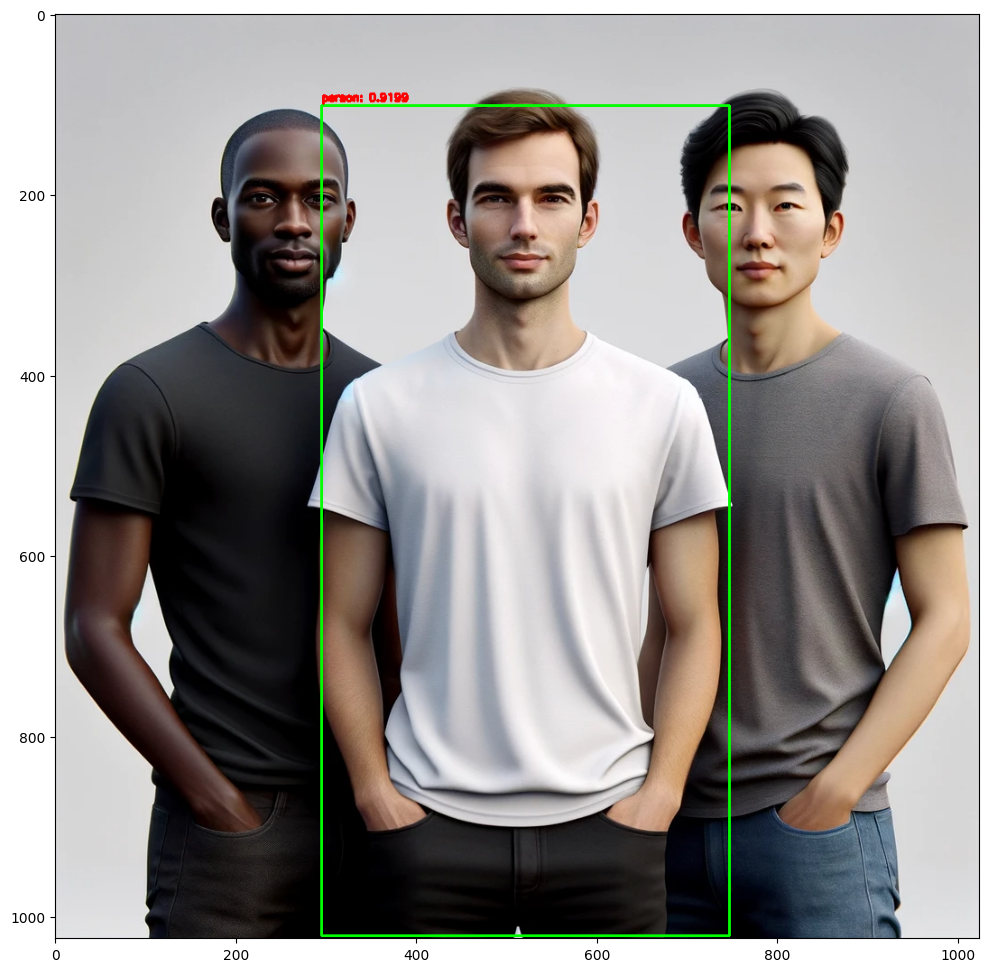

In [9]:
!wget https://github.com/Cobslab/imageBible/blob/main/image/test_image.png?raw=true -O test_image.png

img_array = cv2.cvtColor(cv2.imread('test_image.png'), cv2.COLOR_BGR2RGB)
processed_img = detect_objects(model, img_array, 0.3, 100, True)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(processed_img)

## 이미지 분할
- 이미지를 의미 있는 여러 부분으로 나누는 과정
- 객체 탐지에 비해 일반화가 더 어려움

### FCN
- 색상 히스토그램은 이미지 분석에서 중요한 도구로, 이미지 내 특정 색상의 빈도를 그래픽으로 나타냄
- 이는 색상의 분포와 이미지의 전체적인 색감을 이해하는 데 사용되며, 특히 색상 검색, 분류 작업, 이미지 간 비교 등에 있어 매우 유용

#### 주요한 장점
1. 각 증에서 추출된 특징은 해당 위치의 공간적 정보를 계속 유지 - 이는 영역 분할에서 매우 중요한데, 객체의 형태와 위치를 정확하게 파악할 수 있기 때문임
2. 네트워크는 깊어질수록 더 넓은 영역의 정보를 수용할 수 있음 - 이는 넓은 영역에 걸친 패턴과 컨텍스트를 학습하는 데 도움이 됨

In [12]:
!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg

--2025-05-07 05:20:03--  https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146736 (143K) [image/jpeg]
Saving to: ‘three young man.jpg’

three young man.jpg 100%[===================>] 143.30K  --.-KB/s    in 0.003s  

2025-05-07 05:20:03 (45.6 MB/s) - ‘three young man.jpg’ saved [146736/146736]



In [15]:
new_image_color = 'three young man.jpg'
new_image_color = cv2.imread(new_image_color)
image_gray = cv2.cvtColor(new_image_color, cv2.COLOR_BGR2GRAY)

In [16]:
# 임계 값 설정
threshold_vaule = 128
_, thresholded_image = cv2.threshold(image_gray, threshold_vaule, 255, cv2.THRESH_BINARY)

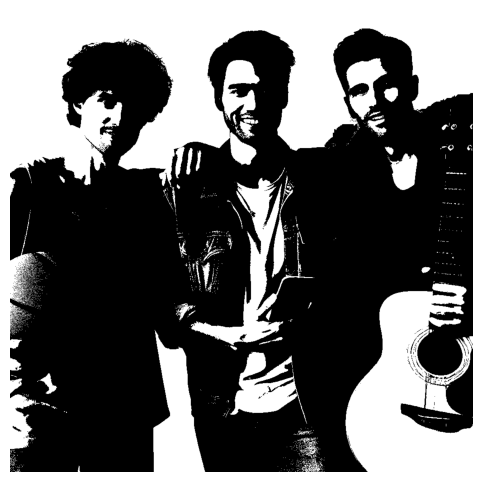

In [17]:
# 결과 이미지 시각화
plt.figure(figsize=(12, 6))
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()